In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dtaidistance import dtw
from dtaidistance import clustering
from sklearn.metrics import silhouette_score

from data import *

# Clustering with time series data as inputs to models

In [2]:
df = pd.read_pickle('df.pkl')
df = clear_data(df)
dist, exec_t = compute_dtw_distance_wells(df, False, False)

In [3]:
print(df.shape)
df.head()

(3000, 5)


,UWI,sp,x,y,signal_len
0,well_21889,"[0.55285714, 0.5158285696, 0.4787999992, 0.441...",0,0,40
1,well_21052,"[0.40714286, 0.40714286, 0.40714286, 0.4071428...",1,0,78
2,well_21108,"[0.5128930786643355, 0.5256043462865803, 0.463...",2,0,48
3,well_21583,"[0.5941460545447186, 0.49742460330502825, 0.43...",3,0,19
4,well_21784,"[0.47609486299352666, 0.43773438875093557, 0.3...",4,0,87


In [4]:
X = df.sp.values.tolist()
len(X)

3000

### KMeans

In [5]:
model = clustering.KMeans(k=2, max_it=10, max_dba_it=10, dists_options={"window": 40})
cluster_idx, performed_it = model.fit(X, use_c=True, use_parallel=True)

{'window': 40}
0.32534742130786504


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.75s/it]


dict_keys([0, 1])


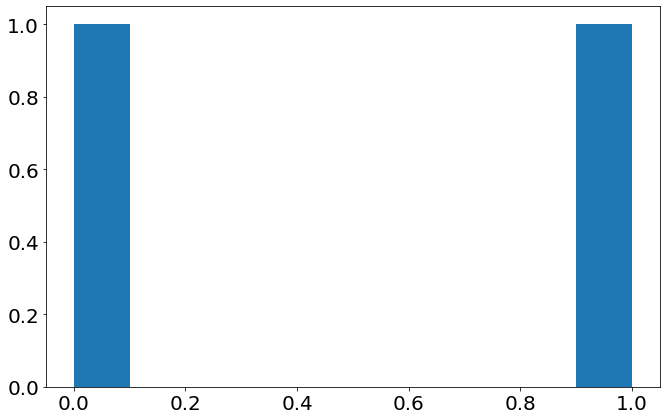

In [6]:
print(cluster_idx.keys())
plt.hist(cluster_idx);

In [7]:
res = pd.DataFrame(index=np.arange(3000), columns=['labels'])
res.iloc[np.array(list(cluster_idx[0])), 0] = 0
res.iloc[np.array(list(cluster_idx[1])), 0] = 1
res.value_counts()

labels
0         2019
1          981
dtype: int64

In [8]:
silhouette_score(dist, res.values.ravel())

0.4441824882184671

### KMedoids

In [9]:
model_medoids = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=2)
cluster_idx_medoids = model_medoids.fit(X)
model_medoids.plot("kmedoids.png");

In [10]:
cluster_idx_medoids.keys()

dict_keys([443, 633])

In [11]:
res = pd.DataFrame(index=np.arange(3000), columns=['labels'])
res.iloc[np.array(list(cluster_idx_medoids[list(cluster_idx_medoids.keys())[0]])), 0] = list(cluster_idx_medoids.keys())[0]
res.iloc[np.array(list(cluster_idx_medoids[list(cluster_idx_medoids.keys())[1]])), 0] = list(cluster_idx_medoids.keys())[1]
res.value_counts()

labels
443       1982
633       1018
dtype: int64

In [12]:
silhouette_score(dist, res.values.ravel())

0.44429017200734433

# Visualize clusters medoids

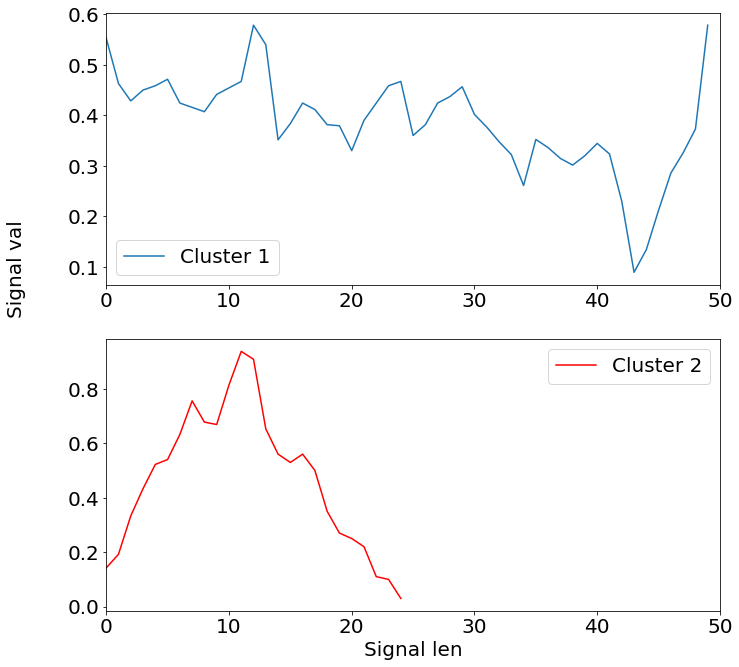

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(11, 11))

axes[1].plot(X[1252], color='r', label='Cluster 2')
axes[0].plot(X[65], label='Cluster 1')
axes[1].set_xlabel('Signal len')
axes[1].legend()
axes[0].legend()

axes[0].set_xlim(0, 50)
axes[1].set_xlim(0, 50)

fig.text(0, 0.5, 'Signal val', rotation=90);

### Plot random clusters entries

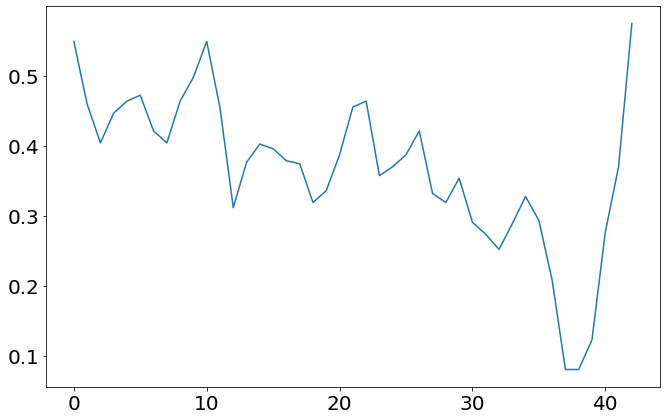

In [14]:
plt.plot(X[1502]);

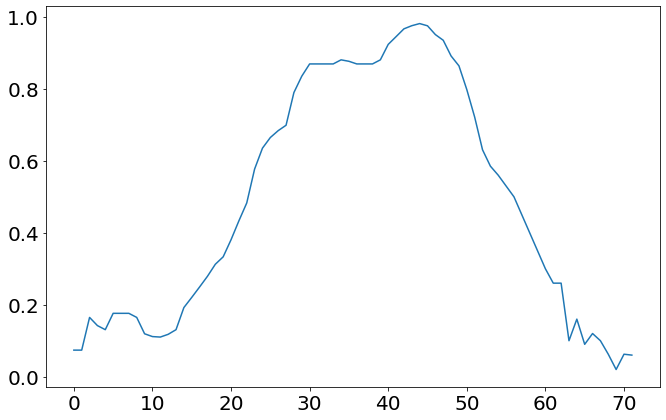

In [15]:
plt.plot(X[2735]);

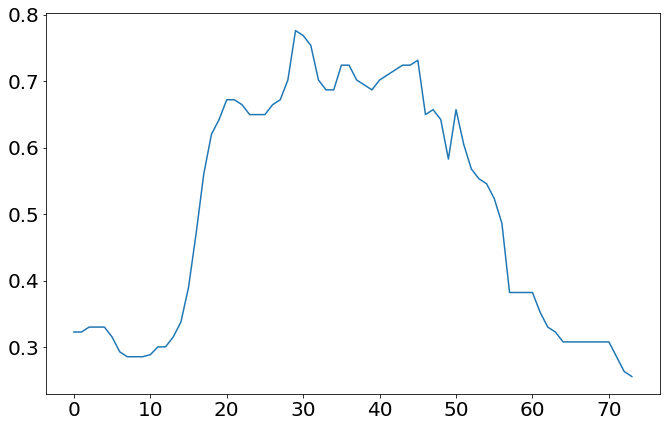

In [16]:
plt.plot(X[261]);